In [1]:
%matplotlib inline

import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import pylab

import scipy as sp
import scipy.stats

from datetime import datetime,timedelta
from matplotlib.colors import Colormap
from numpy import array, polyfit, poly1d
from pandas import DataFrame, to_datetime
from pandas.plotting import register_matplotlib_converters
from scipy.ndimage.filters import gaussian_filter
from scipy.stats import norm,rayleigh
from tkinter import *
from tkinter import filedialog


register_matplotlib_converters()

In [2]:
def get_file():

# Select input file
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "C:\QGHL\Wave_data", title = "Select PRIM master file",\
                        filetypes = (("Prim files","*.prim"),("Seco files","*.seco"),("all files","*.*")))
    root.destroy()

    return(root.filename)

In [3]:
def Site_Info(id):
    
    site_details = [
    [1,'gc01','gold----01','Gold Coast buoy 1'],
    [2,'gc02','gold----02','Gold Coast buoy 2'],
    [3,'gc03','gold----03','Gold Coast buoy 3'],
    [4,'mool','mool----04','Mooloolaba'],
    [5,'gcb5','gcb5----05','Gold Coast BoB 5'],
    [6,'dble','dble----06','Double Island Point'],
    [7,'gcb6','gcb6----07','Gold Coast BoB 6'],
    [8,'yep7','yep7----08','Yeppoon'],
    [8,'cai9','cai9----08','Cairns test'],
    [9,'cair','cair----09','Cairns'],
    [10,'town','town----10','Townsville'],
    [11,'mky1','mky1----11','Mackay'],
    [12,'burn','burn----12','Burnett Heads'],
    [13,'bris','bris----13','Brisbane'],
    [14,'herv','herv----14','Hervey Bay'],
    [15,'hayp','hayp----15','Hay Point'],
    [16,'abbo','abbo----16','Abbot Point'],
    [17,'bown','bown----17','Bowen'],
    [18,'weip','weip----18','Weipa'],
    [19,'nsa1','noos----19','Noosa Near-shore 19'],
    [20,'nsa2','noos----20','Noosa Off-shore Buoy 20'],
    [21,'crns','crns----21','Cairns Near-shore'],
    [22,'bram','bram----22','Bramston Beach'],
    [23,'gold','gold----23','Gold Coast'],
    [24,'rl24','rlyn----24','Rosslyn Bay Near-shore'],
    [25,'rl25','rlyn----25','Rosslyn Bay Off-shore'],
    [26,'nsa3','noos----26','Noosa Near-shore Buoy 26'],
    [27,'kirr','kirr----27','Kirra'],
    [28,'twee','twee----28','Tweed River'],
    [29,'twe9','twe9----29','Tweed River Test'],
    [29,'barc','barc----29','Bar Cutting wave pole'],
    [30,'yblu','yblu----30','Yabulu'],
    [31,'kar1','kar1----31','Karumba in-shore'],
    [32,'kar2','kar2----32','Karumba off-shore'],
    [33,'luci','luci----33','Lucinda'],
    [34,'humb','humb----34','Humbug Reach Temp'],
    [35,'clev','clev----35','Cleveland Bay'],
    [37,'penn','penn----37','Pennefather'],
    [38,'nera','nera----38','Nerang'],
    [40,'mky2','mky2----40','Mackay Slade Point'],
    [41,'mky3','mky3----41','Mackay Blacks Beach'],
    [42,'mky4','mky4----42','Mackay Bucasia Beach'],
    [43,'mky5','mky5----43','Mackay Far Beach'],
    [45,'repu','repu----45','Repulse Bay'],
    [46,'haym','haym----46','Hayman Island'],
    [47,'lind','lind----47','Lindeman Island'],
    [48,'long','long----48','Long Island'],
    [49,'mkyi','mkyi----49','Mackay Inner'],
    [50,'hay9','hay9----50','Hay Point test'],
    [51,'nwb1','nwb1----51','Caloundra'],
    [52,'nmwb','nmwb----52','North Moreton Bay'],
    [53,'cmwb','cmwb----53','Central Moreton Bay'],
    [54,'calo','calo----54','Caloundra PoB'],
    [55,'tow9','tow9----55','Townsville test'],
    [56,'glax','glax----56','Gladstone Old'],
    [57,'her1','her1----57','Heron Is. Blue Pools'],
    [58,'her2','her2----58','Heron Is. Wistari Ch.'],
    [58,'alb9','alb9----58','Albatross Bay test'],
    [59,'alby','alby----59','Albatross Bay'],
    [60,'glad','glad----60','Gladstone GPA'],
    [61,'gla9','gla9----61','Gladstone Test'],
    [62,'gla8','gla8----62','Gladstone Temp'],
    [63,'mibt','mibt----63','Moreton Island BoB Test'],
    [64,'abot','abot----64','Abbot Point NQBP'],
    [66,'cal9','cal9----66','Caloundra PoB test'],
    [67,'bil9','bil9----67','Bilinga test'],
    [68,'varz','varz----68','Varzin Passage'],
    [69,'gann','gann----69','Gannet Passage'],
    [70,'woor','woor----70','Woorim'],
    [71,'toog','toog----71','Toogoom'],
    [72,'wood','wood----72','Woodgate'],
    [72,'weib','weib----72','Weipa Bob Test'],
    [73,'moor','moor----73','Moore Park'],
    [73,'deb3','deb3----73','TC Debbie BoB 3'],
    [74,'barg','barg----74','Bargara'],
    [74,'deb5','deb5----74','TC Debbie BoB 5'],
    [75,'coon','coon----75','Coonarr'],
    [76,'bndy','bndy----76','Bundaberg'],
    [77,'pbi1','pbi1----77','Palm Beach Inner 1'],
    [78,'pbo1','pbo1----78','Palm Beach Outer 1'],
    [79,'pbi2','pbi2----79','Palm Beach Inner 2'],
    [80,'mky9','mky9----80','Mackay Test'],
    [81,'bri9','bri9----81','Brisbane Test'],
    [82,'pbi3','pbi3----82','Palm Beach Inner 3'],
    [83,'pbi4','pbi4----83','Palm Beach Inner 4'],
    [84,'pbo2','pbo2----84','Palm Beach Outer 2'],
    [93,'more','more----93','Moreton Bay'],
    [94,'lois','lois----94','Low Islets'],
    [95,'dunk','dunk----95','Dunk Island'],
    [95,'w4m4','w4m4----95','Waves4 Mk4 test'],
    [97,'emu9','emu9----97','Emu Park test'],
    [97,'w4m3','w4m3----97','Waves4 Mk3 test Bris Oct2015'],
    [98,'emup','emup----98','Emu Park'],
    [99,'brib','brib----99','Bribie Island'],
    [99,'bobm','bobm----99','BoB'],
    [111,'mky6','mky6----11','Mackay Inner 6'],
    [901,'eden','eden----901','Eden'],
    [995,'holl','holl----995','Holloways Beach']]

    try:  
        site_name = (site_details[[site_details[i][0] for i in range(len(site_details))].index(id)][3])
    except:
        print("No details found for Id ",id)
        site_name = 'Un assigned!'

    return(site_name)    # Site_Info()

In [4]:
def First_Dates(id):
# Identify the date of the first 6 hourly data point and the first 1 hourly data point.

#    1st column = wave site id number
#    2nd column = exact date of first 6 hour record in PV-Wave julian days
#    3rd column = exact date of first 1 hour record in PV-Wave julian days

# If no 6 hourly data exists in the masterfile then put 0.0 in 2nd column.
# If no 1 hourly data exists in the masterfile then put 0.0 in 3rd column.
# It is important that the above dates are when an actual record exists in the master file.

    site = [
    [1,79671.121,0.0],
    [2,79580.367,0.0],
    [3,79597.625,0.0],
    [4,0.0,90434.083],
    [6,0.0,90650.375],
    [8,81180.625,0.0],
    [9,83461.6250,88153.0007755],
    [10,83789.6250,87341.000011574],
    [11,83774.6250,87833.0],
    [12,81683.625,0.0],
    [13,83917.3750,87359.45833333],
    [14,81985.125,0.0],
    [15,83713.6250,87829.4791666666],
    [16,84061.6250,88082.0208333333],
    [17,82545.625,0.0],
    [18,83721.1250,88050.0208333333],
    [19,83337.375,0.0],
    [20,83337.375,0.0],
    [21,83461.625,0.0],
    [22,83734.625,0.0],
    [23,85625.0,87341.0],
    [24,85619.618,0.0],
    [25,85627.624,0.0],
    [26,86346.622,0.0],
    [27,86179.375,87037.0],
    [28,0.0,88510.50],
    [29,0.0,89410.028],
    [30,85288.610,0.0],
    [31,0.0,88345.042],
    [32,0.0,88348.562],
    [33,0.0,88558.417],
    [35,0.0,87772.750],
    [38,84674.875,0.0],
    [40,85280.630,0.0],
    [41,85707.885,0.0],
    [42,85981.624,0.0],
    [43,86708.630,0.0],
    [45,0.0,88285.0],
    [46,0.0,88796.0],
    [47,0.0,89154.0],
    [48,0.0,89368.667],
    [51,0.0,91672.0],
    [56,83006.625,0.0],
    [57,0.0,88938.458],
    [58,0.0,88938.479],
    [60,0.0,93877.000],
    [70,86208.384,87386.667],
    [71,84966.750,0.0],
    [72,85093.750,0.0],
    [73,85259.531,0.0],
    [74,85259.538,0.0],
    [75,85259.551,0.0],
    [93,0.0,90616.562],
    [94,0.0,89898.001],
    [95,0.0,89944.708],
    [98,0.0,89068.833],
    [99,84280.625,0.0],
    [995,0.0,89565.708],
    [111,0.0,90650.417],
    [813,83917.3750,0.0]]

    s6 = site[[site[i][0] for i in range(len(site))].index(id)][1]
    s1 = site[[site[i][0] for i in range(len(site))].index(id)][2]
    
    return(s6,s1)    # First_Dates()

In [5]:
def Get_dates(recs):
    # Allow user to select all or partial file based on input start and end date
    date_str = input('Enter START DATE in YYYY-MM-DD format (or <99> for entire record): ')
    try:
        start_date = datetime.strptime(date_str, '%Y-%m-%d')
        date_str = input('Enter END DATE in YYYY-MM-DD format: ')
        end_date = datetime.strptime(date_str, '%Y-%m-%d')+timedelta(days=1)    
        mask = (recs['Date_value'] >= start_date) & (recs['Date_value'] < end_date)
        recs = recs.loc[mask]
    except ValueError:
        print('Processing entire file...')
    return()    # Get_dates()

In [6]:
def Do_Clean_Up(recs):
    # remove all rows where column 'Hsig' < 0 and 'Tp' < 0
    deleted = recs.query('Hsig < 0 | Tp < 0')
    print(len(deleted),' records with negative values removed')
    recs = recs.query('Hsig > 0 & Tp > 0')

    # Remove all rows where columns 'Forward' or 'Back' <= 0 
    print('Found and removed ',len(recs.query('Back <= 0.0' or 'Forward <= 0.0')),' duplicate dates')
    print('Duplicate dates indicate a problem in the masterfile regarding the sequence of dates and times of listed records.')
    print('')
    print('Listing of data for site: ',Site_name)
    print('{:6s}{:%d-%m-%Y %H:%M}{:4s}{:%d-%m-%Y %H:%M}'.format('From: ',recs['Date_value'][0], ' To ',recs['Date_value'][-1]))

    recs = recs.drop(columns=['Procid','Loc','Year','Month','Day','Hour','Min','Sec',
                              'H10','Th10','Thmax','Tzmax','Hm0','T02','EPS','Param2'], axis=1)

    # Re-calculate the time difference between records (now that erroneous data removed)
    recs['Back'] = recs['Date_value'].diff(1).dt.total_seconds().div(3600)/2.
    recs['Forward'] = abs(recs['Date_value'].diff(-1).dt.total_seconds().div(3600))/2.
    recs['dur_back'] = recs['Date_value'].diff(1).dt.total_seconds().div(3600)/2.
    recs['dur_forward'] = abs(recs['Date_value'].diff(-1).dt.total_seconds().div(3600))/2.

    # Reset first and last durations to their initial values
    recs.iloc[0, recs.columns.get_loc('Back')] = 0
    recs.iloc[0, recs.columns.get_loc('dur_back')] = 3
    recs.iloc[len(recs)-1, recs.columns.get_loc('Forward')] = 0
    recs.iloc[len(recs)-1, recs.columns.get_loc('dur_forward')] = 0.5
    
    return(recs)    # Do_Clean_Up()

In [7]:
def Do_Table_Days (bin1,bin2,recs_adjusted,table_no,season):

    print('                                                   Table ',table_no)
    print('                                               Wave statistics')
    print('                                     Wave period / wave height occurrences')
    print('                                           ',season,', all directions')
    print('')
    print('                                         Peak Energy Wave Period (seconds)')
    print('Significant')
    print('Wave Height   0-2.99   3-4.99   5-6.99   7-8.99 9-10.99 11-12.99  13-14.99   >14.99     Totals')
    print(' (metres)     ------   ------   ------   ------ ------- --------  --------   ------     ------')
    row_sum_total=0
    col_sum = np.zeros(8)
    for i in bin1:
        row_val = []; col_count = 0
        for x,y in zip(bin2[::],bin2[1::]):
            qry = 'Hsig >= '+str(i)+' and Hsig < '+str(i+0.2)+' and Tp >= '+str(x)+' and Tp < '+str(y)
            val = (sum(recs_adjusted.query(qry)['diff']))/24.
            row_val.append(val)
            col_sum[col_count] += val
            col_count+=1
        qry = 'Hsig >= '+str(i)+' and Hsig < '+str(i+0.2)+' and Tp > '+str(y)
        val = (sum(recs_adjusted.query(qry)['diff']))/24.
        row_val.append(val)
        row_sum = sum(row_val)
        col_sum[col_count] += val
        row_sum_total+=row_sum
        print('{:>3.2f}{:3s}{:>3.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>11.3f}'.format(i,' - ',i+0.19,*row_val,row_sum))

    print('              ------   ------   ------   ------ ------- --------  --------   ------     ------')
    print('{:11s}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>11.3f}'.format('           ',*col_sum,row_sum_total))
    print('')
    row_sum_total_1 = row_sum_total

    return (row_sum_total_1)    # Do_Table_Days()

In [8]:
def Do_Table_Percent (bin1,bin2,recs_adjusted,row_sum_total_1,table_no,season):
    
    print('                                                   Table ',table_no)
    print('                                               Wave statistics')
    print('                                     Wave period / wave height occurrences')
    print('                                           ',season,', all directions')
    print('')
    print('                          Values are percentage occurrence for recording period chosen')
    print('Significant')
    print('Wave Height   0-2.99   3-4.99   5-6.99   7-8.99 9-10.99 11-12.99  13-14.99   >14.99     Totals')
    print(' (metres)     ------   ------   ------   ------ ------- --------  --------   ------     ------')

    List=['Wave Height','0-2.99','3-4.99','5-6.99','7-8.99','9-10.99','11-12.99','13-14.99','>14.99']
    table = pd.DataFrame(columns=List)
    
    row_sum_total=0
    row_sum_list = np.zeros(len(bin1))
    col_sum = np.zeros(len(bin2))

    for i in bin1:
        row_val = []; col_count = 0; Row = []
        Row.append(i)
        for x,y in zip(bin2[::],bin2[1::]):
            qry = 'Hsig >= '+str(i)+' and Hsig < '+str(i+0.2)+' and Tp >= '+str(x)+' and Tp < '+str(y)
            val = (sum(recs_adjusted.query(qry)['diff']))/24./row_sum_total_1*100.
            Row.append(val)
            row_val.append(val)
            col_sum[col_count] += val
            col_count+=1
            
        qry = 'Hsig >= '+str(i)+' and Hsig < '+str(i+0.2)+' and Tp > '+str(y)
        val = (sum(recs_adjusted.query(qry)['diff']))/24./row_sum_total_1*100.

        Row.append(val)
        numEl = len(Row)
        newRow = pd.DataFrame(np.array(Row).reshape(1,numEl), columns = list(table.columns))
        table = table.append(newRow, ignore_index=True)

        row_val.append(val)
        row_sum = sum(row_val)
        col_sum[col_count] += val
        row_sum_total+=row_sum
        row_sum_list[int(i/bin1[1])] = row_sum
        print('{:>3.2f}{:3s}{:>3.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>11.3f}'.format(i,' - ',i+0.19,*row_val,row_sum))

    print('              ------   ------   ------   ------ ------- --------  --------   ------     ------')
    print('{:11s}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>9.2f}{:>11.3f}'.format('           ',*col_sum,row_sum_total))

    return (row_sum_list,col_sum,table)    # Do_Table_Percent ()

In [9]:
def Plot_Height_Histograms(bin1,Row_sum_all,Row_sum_summer,Row_sum_winter):
    
    limit = len(Row_sum_all[Row_sum_all > 0])
    
    plt.figure(figsize=(10,15),dpi=100)
    plt.subplot(3, 1, 1)
    plt.grid()
    plt.xlim(left=0,right=bin1[limit+1])
    plt.bar(bin1,Row_sum_all,width=0.2,align='edge',color='xkcd:aquamarine',edgecolor ='w',linewidth = 2)
    plt.xlabel('Wave height (Hsig) (m) - All data')
    plt.ylabel('% Occurrence of time')

    plt.subplot(3, 1, 2)
    plt.grid()
    plt.xlim(left=0,right=bin1[limit+1])
    plt.bar(bin1,Row_sum_summer,width=0.2,align='edge',color='xkcd:aquamarine',edgecolor ='w',linewidth = 2)
    plt.xlabel('Wave height (Hsig) (m) - Summer data')
    plt.ylabel('% Occurrence of time')

    plt.subplot(3, 1, 3)
    plt.grid()
    plt.xlim(left=0,right=bin1[limit+1])
    plt.bar(bin1,Row_sum_winter,width=0.2,align='edge',color='xkcd:aquamarine',edgecolor ='w',linewidth = 2)
    plt.xlabel('Wave height (Hsig) (m) - Winter data')
    plt.ylabel('% Occurrence of time')

    plt.show()
    
    return()    # Plot_Height_Histograms()

In [10]:
def Plot_Period_Histograms(bin2,Col_sum_all,Col_sum_summer,Col_sum_winter):
    plt.figure(figsize=(10,15),dpi=100)

    plt.subplot(3, 1, 1)
    plt.grid()
    plt.xlim(left=0)
    plt.bar(bin2,Col_sum_all,width=2,align='edge',color='xkcd:salmon',edgecolor ='w',linewidth = 2,tick_label=bin2)
    plt.bar(bin2[0],Col_sum_all[0],width=3,align='edge',color='xkcd:salmon')
    plt.xlabel('Wave period (Tp) (s) - All data')
    plt.ylabel('% Occurrence of time')

    plt.subplot(3, 1, 2)
    plt.grid()
    plt.xlim(left=0)
    plt.bar(bin2,Col_sum_summer,width=2,align='edge',color='xkcd:salmon',edgecolor ='w',linewidth = 2,tick_label=bin2)
    plt.bar(bin2[0],Col_sum_summer[0],width=3,align='edge',color='xkcd:salmon')
    plt.xlabel('Wave period (Tp) (s) - Summer data')
    plt.ylabel('% Occurrence of time')

    plt.subplot(3, 1, 3)
    plt.grid()
    plt.xlim(left=0)
    plt.bar(bin2,Col_sum_winter,width=2,align='edge',color='xkcd:salmon',edgecolor ='w',linewidth = 2,tick_label=bin2)
    plt.bar(bin2[0],Col_sum_winter[0],width=3,align='edge',color='xkcd:salmon')
    plt.xlabel('Wave period (Tp) (s) - Winter data')
    plt.ylabel('% Occurrence of time')

    plt.show()
    
    return()    # Plot_Period_Histograms()

In [11]:
def Do_Display_Days_and_Gaps(recs_adjusted,Whole_days,Maximum_days,Total_days_used,Gaps_from_selected_dates):
    print('')
    print('Maximum Possible Analysis Days (End date - Start date) = ',Whole_days)
    Maximum_possible_analysis_days = Maximum_days+(recs_adjusted.dur_back[0]+recs_adjusted.dur_forward[-1])/24.
    print('{:62s}{:<5.3f}'.format('Maximum Possible Analysis Days (Last record - First record) = ',Maximum_possible_analysis_days))
    print('Total Days Used in Analysis = ',Total_days_used)
    print('{:42s}{:<5.3f}{:5s}'.format('Gaps in data from Selected Dates (Days) = ',Gaps_from_selected_dates,' days'))
    print('Number of Records Used in Analysis = ',len(recs))
    
    return()    # Do_Display_Days_and Gaps()

In [12]:
def Do_number_of_records(recs_adjusted):
    aa = [0,0.5,1,2,3,5,6,6.5]
    total_valus = 0
    for x,y in zip(aa[::],aa[1::]):
        qry = 'diff > '+str(x)+' and diff <= '+str(y)
        valus = recs_adjusted.query(qry)['diff']
        print('{:18s}{:>5.2f}{:3s}{:>5.2f}{:9s}{:6d}{:13s}{:>9.3f}'.\
              format('Number of Records ',x,' - ',y,' hours = ',len(valus),'  No. Days = ',sum(valus)/24))
        total_valus+=sum(valus)/24
    print('{:68}'.format('                                                           ---------'))
    print('{:59s}{:>9.3f}'.format('                                              Total days = ',total_valus))

    return()    # Do_number_of_records()

In [13]:
def Do_Percentage_Exceedance(recs_adjusted,nbin1,bin_size1,Summer,Winter,row_sum_total_all,row_sum_total_summer,row_sum_total_winter,Gaps_from_selected_dates):
    print('')
    print('Percentage Exceedance of Significant Wave Height (Hsig)')
    print('')
    print('   Hsig       Winter     Summer       All')
    print(' (metres)      Data       Data       Data')

    occur_total = 0
    for i in np.arange(0, nbin1*bin_size1, bin_size1):
        qry = 'Hsig >= '+str(i)
        val1 = (sum(recs_adjusted.query(qry)['diff']))/24.
        val2 = (sum(Summer.query(qry)['diff']))/24.
        val3 = (sum(Winter.query(qry)['diff']))/24.
        print('{:>7.2f}{:>13.3f}{:>11.3f}{:>11.3f}'.format(i,val3/row_sum_total_winter*100,val2/row_sum_total_summer*100,val1/row_sum_total_all*100))
        occur_total+=val1
    print('{:42s}{:>5.2f}'.format('Total gaps excluded from the analysis (%):',Gaps_from_selected_dates/row_sum_total_all*100))

    return()    # Do_Percentage_Exceedance()

In [14]:
def Do_Ratios(recs_adjusted):
    print('Processing wave parameter relationships')
    recs_adjusted['hmax_hsig'] = recs_adjusted.Hmax/recs_adjusted.Hsig
    recs_adjusted['hsig_hrms'] = recs_adjusted.Hsig/recs_adjusted.Hrms
    recs_adjusted['tp_tz'] = recs_adjusted.Tp/recs_adjusted.Tz
    recs_adjusted['tp_thsig'] = recs_adjusted.Tp/recs_adjusted.Thsig
    
# Do % occurrances
####################################################
    step = 0.05
    max_val = 3.0
    num = int(max_val/step)
    x1 = np.arange(0,max_val,step = 0.05)
    p_occ_0 = np.zeros(num); p_occ_1 = np.zeros(num); p_occ_2 = np.zeros(num); p_occ_3 = np.zeros(num)
    for j in range(num-2):
        ll = recs_adjusted.query('hmax_hsig >= ' + str(x1[j]) + '& hmax_hsig < '+str(x1[j+1]))
        if len(ll) > 0:
            p_occ_0[j] = sum(ll['diff'])*100/sum(recs_adjusted['diff'])
        mm = recs_adjusted.query('hsig_hrms >= ' + str(x1[j]) + '& hsig_hrms < '+str(x1[j+1]))
        if len(mm) > 0:
            p_occ_1[j] = sum(mm['diff'])*100/sum(recs_adjusted['diff'])
        nn = recs_adjusted.query('tp_tz >= ' + str(x1[j]) + '& tp_tz < '+str(x1[j+1]))
        if len(nn) > 0:
            p_occ_2[j] = sum(nn['diff'])*100/sum(recs_adjusted['diff'])
        oo = recs_adjusted.query('tp_thsig >= ' + str(x1[j]) + '& tp_thsig < '+str(x1[j+1]))
        if len(nn) > 0:
            p_occ_3[j] = sum(oo['diff'])*100/sum(recs_adjusted['diff'])
            
# Do height means
####################################################    
    step = 0.2
    max_val = 8.0
    num = int(max_val/step)
    x2 = np.arange(0,max_val,step)
    p_mean_0 = np.zeros(num); p_mean_1 = np.zeros(num)
    for j in range(num-2):
        ll = recs_adjusted.query('Hsig >= ' + str(x2[j]) + '& Hsig < '+str(x2[j+1]))
        if len(ll) > 0:
            p_mean_0[j] = np.mean(ll['hmax_hsig'])
            p_mean_1[j] = np.mean(ll['hsig_hrms'])

# Do period means
####################################################    
    step = 1.2
    max_val = 30.0
    num = int(max_val/step)
    x3 = np.arange(0,max_val,step)
    p_mean_2 = np.zeros(num); p_mean_3 = np.zeros(num)
    for j in range(num-2):
        ll = recs_adjusted.query('Tp >= ' + str(x3[j]) + '& Tp < '+str(x3[j+1])+'& Thsig > 0')
        if len(ll) > 0:
            p_mean_2[j] = np.mean(ll['tp_tz'])
            p_mean_3[j] = np.mean(ll['tp_thsig'])
            
# Plot the results
####################################################  
    Font_size = 14
    fig = plt.figure(figsize=(10,15),dpi=100)
    fig, axs = plt.subplots(4, 2, sharex=False)
    fig.subplots_adjust(left=0.1, right=2, bottom=0.1, top=5, wspace=0.15)

    ax = axs[0, 0]
    ax.plot(x1,p_occ_0,linewidth=2,color='b')
    ax.set_xlabel('Ratio Hmax / Hsig',fontsize=Font_size)
    ax.set_ylabel('% Occurence of time',fontsize=Font_size)
    ax.set_xbound(lower=1.0,upper=3.0)
    ax.set_ybound(lower=0,upper=40)

    ax = axs[0, 1]
    ax.plot(x2,p_mean_0,linewidth=2,color='b')
    ax.set_xlabel('Hsig (m)',fontsize=Font_size)
    ax.set_ylabel('Mean Hmax / Hsig',fontsize=Font_size)
    ax.set_xbound(lower=0,upper=4)
    ax.set_ybound(lower=1.5,upper=2)

    ax = axs[1, 0]
    ax.plot(x1,p_occ_1,linewidth=2,color='b')
    ax.set_xlabel('Ratio Hsig / Hrms',fontsize=Font_size)
    ax.set_ylabel('% Occurence of time',fontsize=Font_size)
    ax.set_xbound(lower=0.8,upper=1.8)
    ax.set_ybound(lower=0,upper=80)

    ax = axs[1, 1]
    ax.plot(x2,p_mean_1,linewidth=2,color='b')
    ax.set_xlabel('Hsig (m)',fontsize=Font_size)
    ax.set_ylabel('Mean Hsig / Hrms',fontsize=Font_size)
    ax.set_xbound(lower=0,upper=4)
    ax.set_ybound(lower=1.0,upper=1.8)

    ax = axs[2, 0]
    ax.plot(x1,p_occ_3,linewidth=2,color='r')
    ax.set_xlabel('Ratio Tp / Tz',fontsize=Font_size)
    ax.set_ylabel('% Occurence of time',fontsize=Font_size)
    ax.set_xbound(lower=0.5,upper=3.5)
    ax.set_ybound(lower=0,upper=20)

    ax = axs[2, 1]
    ax.plot(x3,p_mean_2,linewidth=2,color='r')
    ax.set_xlabel('Tp (s)',fontsize=Font_size)
    ax.set_ylabel('Mean Tp / Tz',fontsize=Font_size)
    ax.set_xbound(lower=0,upper=15)
    ax.set_ybound(lower=0,upper=5)

    ax = axs[3, 0]
    ax.plot(x1,p_occ_3,linewidth=2,color='r')
    ax.set_xlabel('Ratio Tp / THsig',fontsize=Font_size)
    ax.set_ylabel('% Occurence of time',fontsize=Font_size)
    ax.set_xbound(lower=0.5,upper=3.0)
    ax.set_ybound(lower=0,upper=40)

    ax = axs[3, 1]
    ax.plot(x3,p_mean_3,linewidth=2,color='r')
    ax.set_xlabel('Tp (s)',fontsize=Font_size)
    ax.set_ylabel('Mean Tp / THsig',fontsize=Font_size)
    ax.set_xbound(lower=0,upper=15)
    ax.set_ybound(lower=0,upper=4)
    
    plt.show()

    return()    # Do_Ratios()

In [15]:
def do_heatmap(table,Period):

    Heights = table.iloc[0:table.shape[0],0].values
    Durations = table.columns[1:].values

    ##    table1 = table.mul(1/max(table.max())*100)
    table1 = table
    Duration_table = table1.iloc[0:,1:table1.shape[1]].values


    fig, ax = plt.subplots(figsize=(15,10))

    cmap = cm.YlGnBu
    cmap.set_under(color = 'white')
    im = ax.imshow(Duration_table, cmap=cmap, clim=(0.01,100), interpolation='nearest', aspect='auto')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(Durations)))
    ax.set_yticks(np.arange(len(Heights)))

    #ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_xlabel('Peak period (s)')
    ax.xaxis.set_label_position('top') 
    ax.set_ylabel('Hs (m)')

    # ... and label them with the respective list entries
    ax.set_xticklabels(Durations)
    Heights = ["{0:.1f}".format(x) for x in Heights]
    ax.set_yticklabels(Heights)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(Heights)):
        for j in range(len(Durations)):
            text = ax.text(j, i, "%.2f" % Duration_table[i, j],fontsize=14,style='italic',ha="center", va="center", color="b")

    ax.set_title("Hs vs peak wave period - "+Period,fontsize=16,y=-0.05)

    sigma = 0.1 # this depends on how noisy your data is, play with it!
    smoothed_data = gaussian_filter(Duration_table, sigma)

    ax.contour(smoothed_data, colors="B", levels=(0.01,1,2,5,10,20,50))
    #    clb = plt.colorbar(im)
    #    clb.ax.set_title('%')

    fig.tight_layout()
    plt.show()
    
    return()    # Do_heatmap()

Enter START DATE in YYYY-MM-DD format (or <99> for entire record): 99
Processing entire file...
14  records with negative values removed
Found and removed  0  duplicate dates
Duplicate dates indicate a problem in the masterfile regarding the sequence of dates and times of listed records.

Listing of data for site:  Mackay
From: 19-09-1975 03:00 To 28-03-2017 05:00
                                                   Table  1
                                               Wave statistics
                                     Wave period / wave height occurrences
                                            All Data , all directions

                                         Peak Energy Wave Period (seconds)
Significant
Wave Height   0-2.99   3-4.99   5-6.99   7-8.99 9-10.99 11-12.99  13-14.99   >14.99     Totals
 (metres)     ------   ------   ------   ------ ------- --------  --------   ------     ------
0.00 - 0.19    31.99    14.54     9.31    34.94    55.35    20.21     5.71     0.94    

0.00 - 0.19    23.99     9.86     8.30    24.47    38.94    16.06     5.29     0.75    127.672
0.20 - 0.39   192.39   285.86    78.71   244.80   305.43   108.77    21.15     2.50   1239.612
0.40 - 0.59    65.96   667.47   147.25   193.88   197.12    81.39    12.05     2.59   1367.712
0.60 - 0.79     2.96   623.53   200.91    83.44    71.51    30.15     5.39     0.44   1018.310
0.80 - 0.99     0.00   390.97   264.05    46.89    27.64    11.32     1.85     0.02    742.744
1.00 - 1.19     0.00   197.97   348.01    33.29    12.81     4.25     0.42     0.00    596.752
1.20 - 1.39     0.50    71.34   357.49    25.99     6.00     2.62     0.04     0.00    463.973
1.40 - 1.59     0.00    16.15   301.43    23.01     2.62     1.15     0.00     0.00    344.353
1.60 - 1.79     0.00     1.98   206.55    25.41     1.18     0.29     0.00     0.00    235.411
1.80 - 1.99     0.00     0.42   108.07    21.63     0.39     0.09     0.00     0.00    130.595
2.00 - 2.19     0.00     0.02    52.39    20.39   

2.00 - 2.19     0.00     0.00     1.68     0.58     0.03     0.00     0.00     0.00      2.292
2.20 - 2.39     0.00     0.00     0.73     0.61     0.05     0.00     0.00     0.00      1.391
2.40 - 2.59     0.00     0.00     0.29     0.49     0.03     0.00     0.00     0.00      0.806
2.60 - 2.79     0.00     0.00     0.09     0.34     0.01     0.00     0.00     0.00      0.443
2.80 - 2.99     0.00     0.00     0.02     0.19     0.01     0.01     0.00     0.00      0.225
3.00 - 3.19     0.00     0.00     0.00     0.09     0.01     0.00     0.00     0.00      0.101
3.20 - 3.39     0.00     0.00     0.00     0.05     0.01     0.00     0.00     0.00      0.056
3.40 - 3.59     0.00     0.00     0.00     0.03     0.01     0.00     0.00     0.00      0.032
3.60 - 3.79     0.00     0.00     0.00     0.02     0.01     0.00     0.00     0.00      0.025
3.80 - 3.99     0.00     0.00     0.00     0.01     0.01     0.00     0.00     0.00      0.021
4.00 - 4.19     0.00     0.00     0.00     0.01   

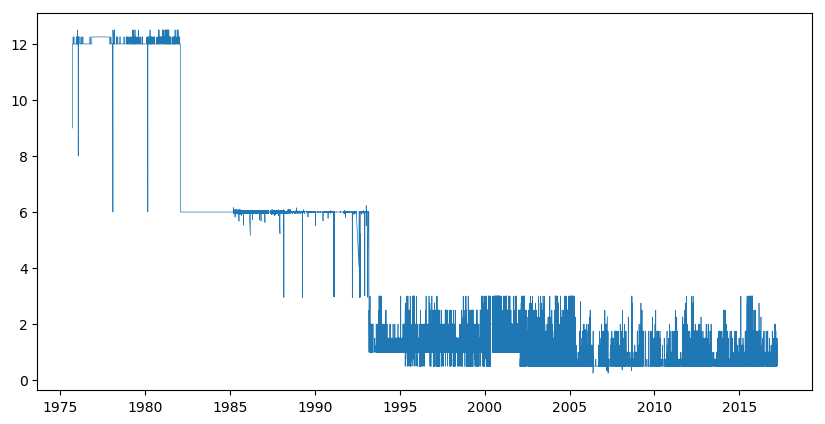

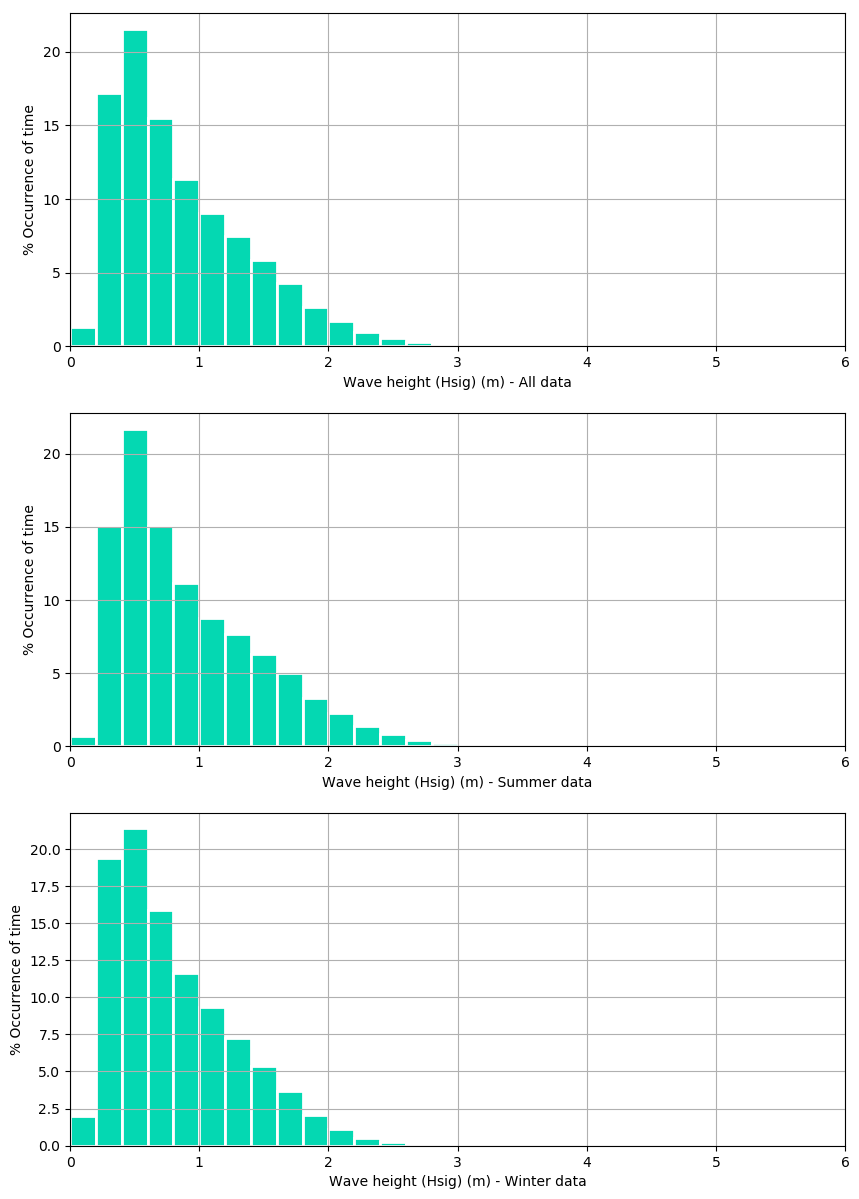

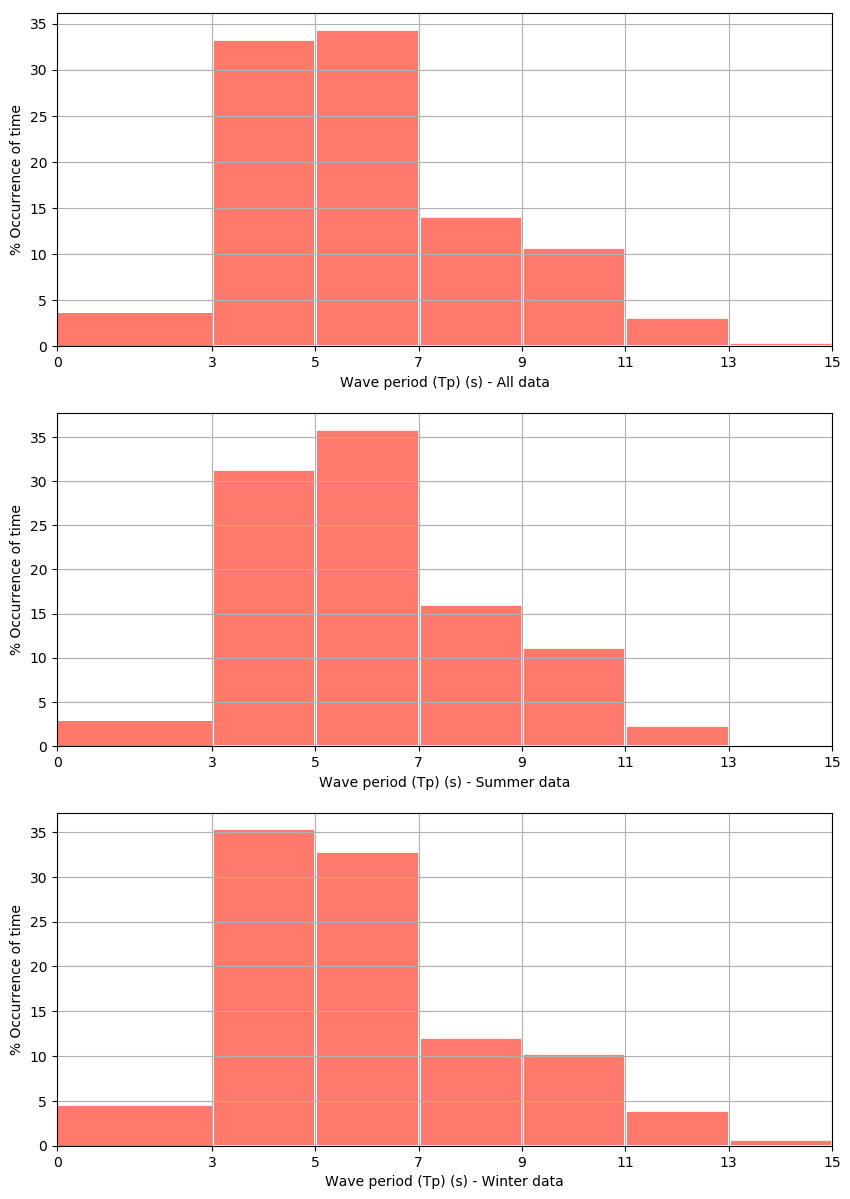

Processing wave parameter relationships


<Figure size 1000x1500 with 0 Axes>

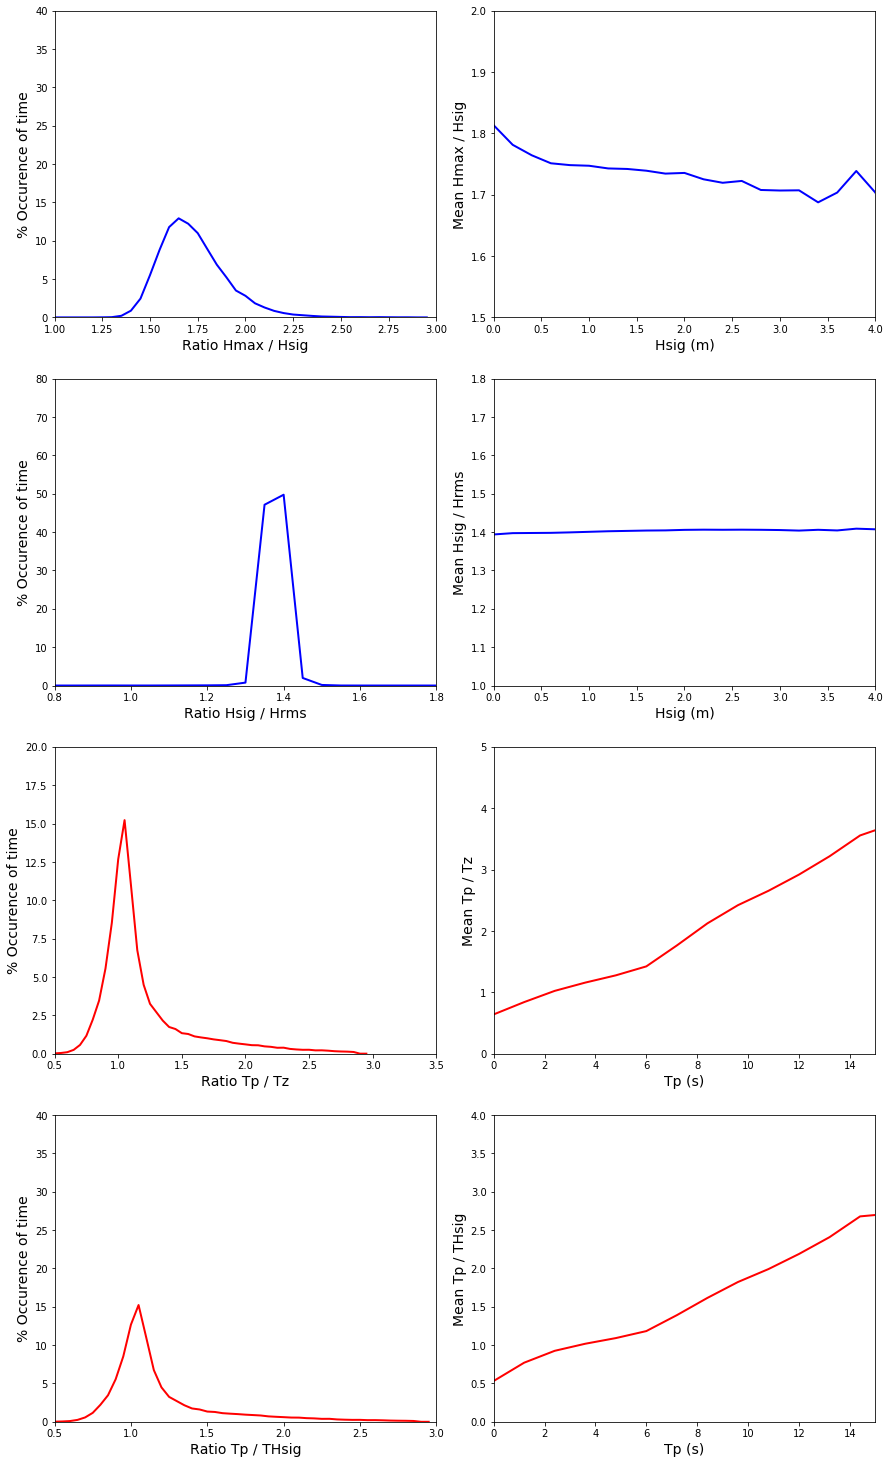

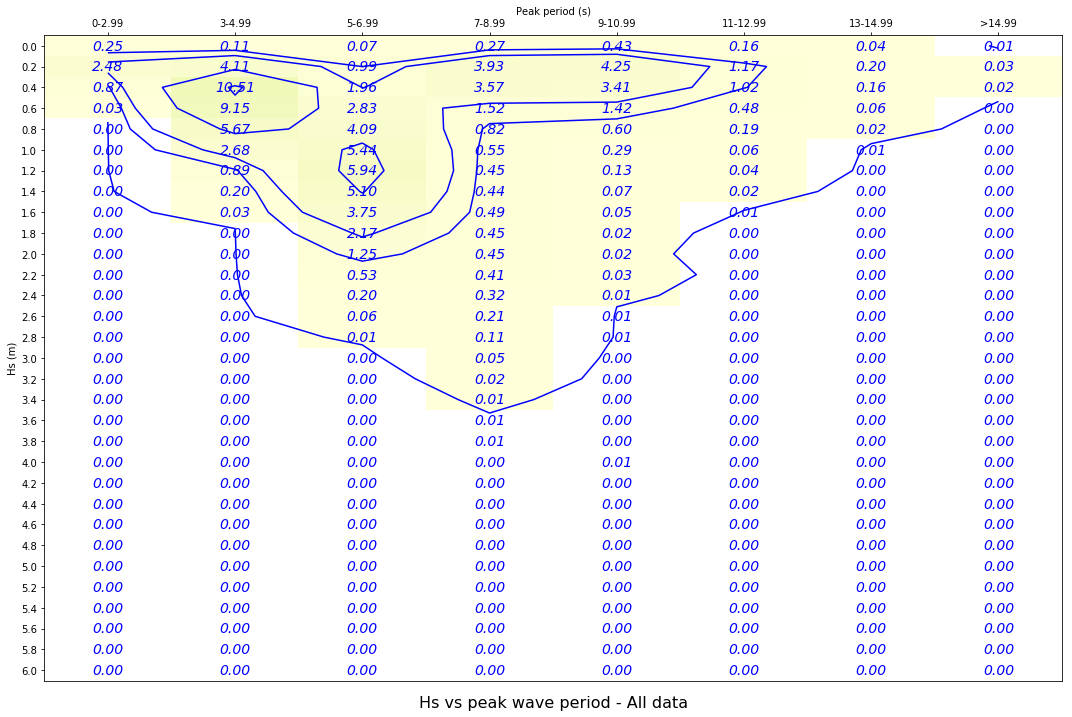

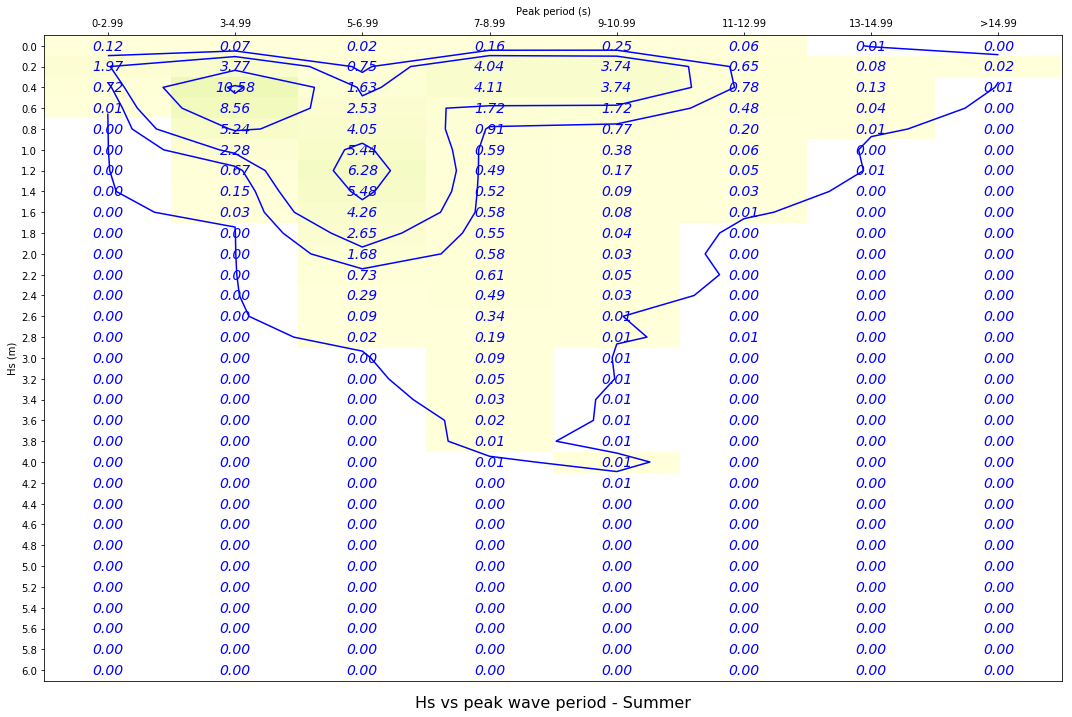

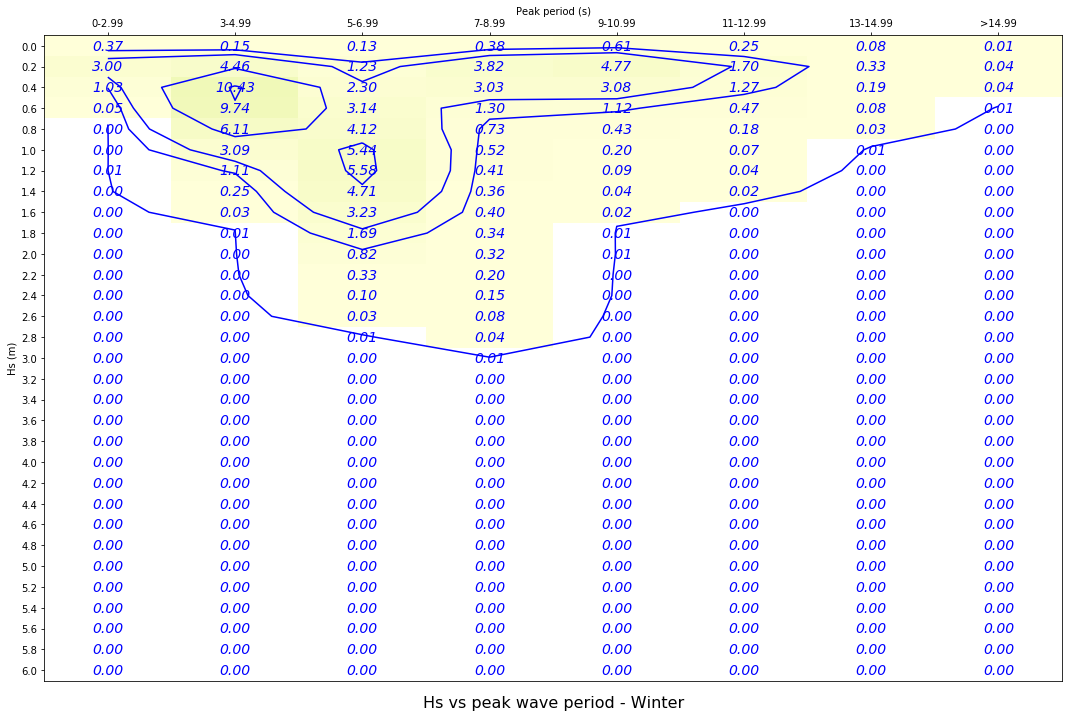

()

In [16]:
# #    MAIN PROGRAM
############################################

# Create a DT based on the structure type of the PRIM Master File
# Details copied from PV~Wave file Master_structure_types_corrected.pro
pp1 = np.dtype([
    ('P1', 'B'),('P2', 'B'),('P3', 'B'),('P4', 'B'),('P5', 'B'),('P6', 'B'),('P7', 'B'),('P8', 'B'),
    ('P9', 'B'),('P10', 'B'),('P11', 'B'),('P12', 'B')])
pp2 = np.dtype([('p1', 'f'),('p2', 'f'),('p3', 'f'),('p4', 'f')])

rectype = np.dtype([
    ('Procid',pp1),
    ('Loc','i'),
    ('Year','i'),('Month','i'),('Day', 'i'),('Hour', 'i'),('Min', 'i'), ('Sec','i'), 
    ('Hsig','f'), ('Thsig','f'), ('Hrms', 'f'), ('Hmax', 'f'),('Tc', 'f'),('Tz', 'f'), ('H10', 'f'), 
    ('Th10', 'f'), ('Thmax', 'f'), ('Tzmax', 'f'), ('Hm0', 'f'),('T02', 'f'),('Tp', 'f'), ('EPS', 'f'), 
    ('Npts', 'i'),
    ('Param2',pp2)])

# Get name of input PRIM file
Input_Prim_File = get_file()

# Open file
f = open(Input_Prim_File)

# Read data from the Binary file into a DF based on the structure in the DT
recs = DataFrame(np.fromfile(f, rectype))

# Get the first 6 hourly data point and the first 1 hourly data point
Location = recs['Loc'].head(1)
s6,s1 = First_Dates(Location[0])
Site_name = Site_Info(Location[0])     
    
# Convert date/time column data into Dates and times
Record_time = pd.DataFrame({'Year': recs.Year,'month': recs.Month,'day': recs.Day,'hour': recs.Hour,\
                            'minute': recs.Min,'second': recs.Sec})

# Initially found an issue in the Townsville Master File - some year data for 1998 entered as 98
#    - this caused problems with date conversion, so included fix!
Record_time['Year'] = np.where(Record_time.Year < 1900, Record_time.Year + 1900, Record_time.Year)

# Insert Date column at start of DF
recs.insert(0,'Date',pd.to_datetime(Record_time))

# Convert Date to index, and remove unwanted columns from the DF
recs.set_index('Date', inplace=True)
recs['Date_value'] = recs.index
recs['Back'] = recs['Date_value'].diff(1).dt.total_seconds().div(3600)
recs['Forward'] = abs(recs['Date_value'].diff(-1).dt.total_seconds().div(3600))

# Allow user to select all or partial file based on input start and end date
Get_dates(recs)
    
# make a copy of original data for debugging purposes
recs_old = recs

# Remove duplicate dates
recs = recs.drop_duplicates(['Date_value'])

Number_of_days = recs['Date_value'].tail(1)-recs['Date_value'].head(1).values
Maximum_days = (Number_of_days.astype('timedelta64[s]')).item()/86400
Whole_days = int(Maximum_days) + 1

# Clean up records and delete negatives values or duplicate dates
recs = Do_Clean_Up(recs)

# Convert Julian dates into date/Time values
# Note - In PV~Wave, the date/time value is interpreted as a day in a series of days that begins on September 14, 1752.
# See https://docs.roguewave.com/pv-wave/2017.0/pvwave_online_help/pvwave.html#page/Foundation/jul_to_dt.html
Start_of_one = str(datetime.strptime('1752 9 14', '%Y %m %d')+timedelta(seconds=int(s1*24.*60*60))-timedelta(days=1))
Start_of_six = str(datetime.strptime('1752 9 14', '%Y %m %d')+timedelta(seconds=int(s6*24.*60*60)))
End_of_six = str(datetime.strptime('1752 9 14', '%Y %m %d')+timedelta(seconds=int(s1*24.*60*60))-timedelta(days=2))

#print('{:15s}{:10s}'.format('Start_of_six = ',Start_of_six))
#print('{:15s}{:10s}'.format('Start_of_one = ',Start_of_one))

# Process backward and forward durations (days)
gaps = 0; gaps_adjusted = 0

# Consider only dates when taking 12-hourly records
####################################################
dur_allow_12 = 6.25
recs_Twelve = recs.loc[recs.Date_value < Start_of_six].copy()
gaps12 = sum(recs_Twelve.loc[(recs_Twelve.Forward > dur_allow_12)].Forward-3) + \
           sum(recs_Twelve.loc[(recs_Twelve.Back > dur_allow_12)].Back-3)
mask = recs_Twelve.dur_back > dur_allow_12; column_name = 'dur_back'
recs_Twelve.loc[mask, column_name] = dur_allow_12
mask = recs_Twelve.dur_forward > dur_allow_12; column_name = 'dur_forward'
recs_Twelve.loc[mask, column_name] = dur_allow_12

gaps12_adjusted = sum(recs_Twelve.loc[(recs_Twelve.dur_forward > dur_allow_12)].dur_forward-3) + \
           sum(recs_Twelve.loc[(recs_Twelve.dur_back > dur_allow_12)].dur_back-3)

# Consider only dates when taking 6-hourly records
####################################################
dur_allow_6 = 3.25
recs_Six = recs.loc[Start_of_six:End_of_six].copy()
gaps6 = sum(recs_Six.loc[(recs_Six.Forward > dur_allow_6)].Forward-1.5) + \
           sum(recs_Six.loc[(recs_Six.Back > dur_allow_6)].Back-1.5)

mask = recs_Six.dur_back > dur_allow_6; column_name = 'dur_back'
recs_Six.loc[mask, column_name] = 3
mask = recs_Six.dur_forward > dur_allow_6; column_name = 'dur_forward'
recs_Six.loc[mask, column_name] = 3

gaps6_adjusted = sum(recs_Six.loc[(recs_Six.dur_forward > dur_allow_6)].dur_forward-1.5) + \
           sum(recs_Six.loc[(recs_Six.dur_back > dur_allow_6)].dur_back-1.5)

# Consider only dates when taking 1-hourly records
####################################################
dur_allow_1 = 1.5
recs_One = recs.loc[recs.Date_value >= Start_of_one].copy()
gaps1 = sum(recs_One.loc[(recs_One.Forward > dur_allow_1)].Forward-dur_allow_1/2) + \
           sum(recs_One.loc[(recs_One.Back > dur_allow_1)].Back-dur_allow_1/2)
mask = recs_One.dur_back > dur_allow_1; column_name = 'dur_back'
recs_One.loc[mask, column_name] = dur_allow_1
mask = recs_One.dur_forward > dur_allow_1; column_name = 'dur_forward'
recs_One.loc[mask, column_name] = dur_allow_1

frames = [recs_Twelve,recs_Six,recs_One]
recs_adjusted = pd.concat(frames)
recs_adjusted['diff'] = recs_adjusted.dur_back + recs_adjusted.dur_forward
recs_adjusted['Month'] = pd.DatetimeIndex(recs_adjusted.Date_value).month

gaps1_adjusted = sum(recs_One.loc[(recs_One.dur_forward > dur_allow_1)].dur_forward-dur_allow_1/2) + \
   sum(recs_One.loc[(recs_One.dur_back > dur_allow_1)].dur_back-dur_allow_1/2)

gaps = gaps12+gaps6+gaps1
gaps_adjusted = gaps12_adjusted+gaps6_adjusted+gaps1_adjusted

Total_days_used = (sum(recs_adjusted.dur_forward) + sum(recs_adjusted.dur_back))/24.
Gaps_from_selected_dates = ((sum(recs_adjusted.Forward)+sum(recs_adjusted.Back))-(sum(recs_adjusted.dur_forward)+sum(recs_adjusted.dur_back)))/24

plt.figure(figsize=(10,5),dpi=100)
plt.plot(recs_adjusted['Date_value'],recs_adjusted['diff'],linewidth=0.5)

##bin_size1 = input('Enter required Hsig bin size (m): ')
bin_size1 = 0.2 #<<<<<<<<<<< Remove this when done!

# setup bin arrays
nbin1 = int(max(recs['Hsig'])/float(bin_size1))+3
bin1 = np.arange(0, nbin1*bin_size1, bin_size1)
bin2 = [0,3,5,7,9,11,13,15]
nbin2 = len(bin2)

# Display Wave statistics (in Days) based on Period/Height Occurrences (Tables 1 - 3)
####################################################
row_sum_total_all = Do_Table_Days(bin1,bin2,recs_adjusted,1,'All Data') # All Data, All Directions

qry = 'Month < 5 or Month > 10'; Summer = recs_adjusted.query(qry)
row_sum_total_summer = Do_Table_Days(bin1,bin2,Summer,2,' Summer') # Summer Data, All Directions

qry = 'Month >= 5 and Month <= 10'; Winter = recs_adjusted.query(qry)
row_sum_total_winter = Do_Table_Days(bin1,bin2,Winter,3,' Winter') # Winter Data, All Directions

# Display Wave statistics (in Percent) based on Period/Height Occurrences
####################################################
row_sum_list_all,Col_sum_all,table_all = Do_Table_Percent (bin1,bin2,recs_adjusted,row_sum_total_all,1,'All Data') # All Data, All Directions
row_sum_list_summer,Col_sum_summer,table_Summer = Do_Table_Percent (bin1,bin2,Summer,row_sum_total_summer,2,' Summer')
row_sum_list_winter,Col_sum_winter,table_Winter = Do_Table_Percent (bin1,bin2,Winter,row_sum_total_winter,3,' Winter')

# Display day and gap details
####################################################
Do_Display_Days_and_Gaps(recs_adjusted,Whole_days,Maximum_days,Total_days_used,Gaps_from_selected_dates)

# Display number of records in time bands
####################################################
Do_number_of_records(recs_adjusted)

# Display Percentage Exceedance of Significant Wave Height (Hsig)
####################################################
Do_Percentage_Exceedance(recs_adjusted,nbin1,bin_size1,Summer,Winter,row_sum_total_all,row_sum_total_summer,row_sum_total_winter,Gaps_from_selected_dates)

# Plot the Height & Period Histograms (Figures 3 & 4)
####################################################
Plot_Height_Histograms(bin1,row_sum_list_all,row_sum_list_summer,row_sum_list_winter)
Plot_Period_Histograms(bin2,Col_sum_all,Col_sum_summer,Col_sum_winter)

# Plot Wave Parameter Relationships (Figure 5)
####################################################
Do_Ratios(recs_adjusted)
do_heatmap(table_all,'All data')
do_heatmap(table_Summer,'Summer')
do_heatmap(table_Winter,'Winter')

In [64]:
os.path.splitext(os.path.split(path+'/'+entry.name)[1])[0].split('/')[-1].split('}')[0].upper()

'BRISBANE_4183'

In [65]:
os.path.splitext(os.path.split(path+'/'+entry.name)[1])[0].split('}')[1].split('.')[0]

'2019-04-30T00h00Z'

In [53]:
import os
path = 'C:/QGHL/Wave_data/Bris/HVA'
with os.scandir(path) as it:
    for entry in it:
        if entry.name.endswith('.hva') and entry.is_file():
            print(os.path.dirname(path+'/'+entry.name),os.path.basename(path+'/'+entry.name),os.path.getsize(path+'/'+entry.name))

C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-01T00h00Z.hva 434589
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-07T04h36Z.hva 2769943
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-08T00h00Z.hva 3428445
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-09T00h00Z.hva 3428414
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-10T00h00Z.hva 3428445
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-11T00h00Z.hva 3428445
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-12T00h00Z.hva 3422648
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-13T00h00Z.hva 3428445
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-14T00h00Z.hva 3428414
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-15T00h00Z.hva 3428445
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-16T00h00Z.hva 3428414
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-17T00h00Z.hva 67611
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-17T00h33Z.hva 64728
C:/QGHL/Wave_data/Bris/HVA brisbane_4183}2018-12-17T01h00Z.hva 3285194
C:/QGHL/Wav

In [38]:
entry.name

'brisbane_4183}2018-12-01T00h00Z.hva'

In [46]:
os.stat(path+'/'+entry.name).st_size

434589

In [45]:
a.size()

AttributeError: 'os.stat_result' object has no attribute 'size'